# Анализ и интерпретация данных о развитии аграрного сектора Индии: тенденции, проблемы и перспективы

Предварительный анализ набора данных предоставляет информацию о состоянии сельского хозяйства Индии на уровне штатов, округов, урожаев, площадей и объёмов производства растениеводческой продукции. Это исследование позволит изучить особенности сельского хозяйства Индии и понять, как они влияют на развитие отрасли.

Работы выполнена в рамках промежуточной аттестации по модулю 1.

Исполнитель: [Боталов Константин Владимирович](mailto:konstantin@botalov.pro).

Ссылка на файл Jupiter Notebook - ...

## Цель и задачи исследования

**Цель исследования** — выявить основные тенденции, проблемы и перспективы развития сельского хозяйства Индии на основе анализа данных с использованием технологии EDA (Exploratory Data Analysis) в рамках библиотеки [**pandas**](https://pandas.pydata.org/) и интерактивного веб-приложения [**Jupiter Notebook**](https://jupyter.org/).

**Задачи исследования:**
- изучить распределения данных в виде статистик и визуализаций;
- найти и удалить повторяющиеся данные (удалить дубликаты);
- обработать отсутствующие значения;
- найти и обработать выбросы и аномалии;
- выполнить построение и анализ матрицы корреляции;
- произвести группировку данных по различным измерениям и типам агрегации;
- построить сводные таблицы;
- визуализировать динамику изменений показателей;
- визуализировать и проверить основные гипотезы;
- сделать краткие выводы.

## Основные инструменты исследования

- Python 3.12
- **Jupyter Server** 2.14.2 и интерактивное веб-приложение **Jupiter Notebook** - 7.2.2
- Библиотека **pandas** - 2.2.2
- Библиотека **matplotlib** - 0.13.2

## Описание набора данных

Набор данных представляет собой структурированную коллекцию информации о сельскохозяйственном производстве по штатах и округах Индии с 1997 по 2015 годы.

Ссылка на исходный набор данных https://www.kaggle.com/datasets/ppb00x/indiaagriculture

## Загрузка набора данных

1) Вручную загружаем архив с исходным набором данных с сайта **kaggle.com** [(ссылка)](https://www.kaggle.com/datasets/ppb00x/indiaagriculture).
2) Распаковываем архив в рабочий каталог  **./kaggle**. Исходный архив удаляем.
3) Импортируем необходимые для работы библиотеки:

In [2]:
# Импорт необходимых библиотек
import os                           # os - для работы с файлами операционной системы
import pandas as pd                 # pandas - Основная библиотека для работы с табличными данными
import matplotlib.pyplot as plt     # matplotlib - для отрисовки и визуализации данных 
import seaborn as sns
import numpy as np

%matplotlib inline

4) Устанавливаем каталог **./kaggle** с набором данных в качестве рабочего каталог 

In [3]:
# Рабочий каталог с набором данных
data_dir = './kaggle/'

5) Проверяем, что набор данных загружен в рабочий каталог:

In [4]:
os.listdir(data_dir)

['Crop Production data-Final-csv.csv']

Файл с набором данных присутствует в рабочем каталоге и представлен файлом в формате CSV.

Формат CSV (Comma-Separated Values) является распространенным и удобным способом представления табличных данных, что облегчает их обработку, анализ и интеграцию с различными программными средствами и аналитическими инструментами. Следовательно, мы можем этот набор данных загрузить и обработать средствами библиотеки **pandas**.

6) Загружаем из рабочего каталогам файл с набором данных в качестве дата-фрейма:

In [4]:
# Загрузка исходного набора данных в дата-фрейм из CSV-файла
df = pd.read_csv(data_dir + 'Crop Production data-Final-csv.csv')

7) Набор данных загружен и готов для исследования

## Первичное исследование набора данных

Первичное исследование набора данных позволит нам ознакомиться с набором данных, понять его структуру и подготовить базу для дальнейшего, более глубокого анализа.

#### Проверка типа загруженного набора данных

In [6]:
# Вывод типа переменной df - исследуемого набора данных
type(df)

pandas.core.frame.DataFrame

Набор данных загружен в виде необходимого нам дата-фрейма Pandas (*.DataFrame). Приведение к другим типам данных загруженного набора не требуется.

#### Проверка наличия данных в загруженном наборе

Вычислим 10 произвольных строк из набора данных:

In [7]:
# Выводим десять случайных строк
df.sample(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Region
147064,Odisha,ANUGUL,2005,Summer,Maize,11.0,13.70000,East India
177032,Sikkim,EAST DISTRICT,2005,Kharif,Urad,410.0,300.00000,Northeast India
183166,Tamil Nadu,NAMAKKAL,2008,Whole Year,Banana,2705.0,120244.00000,South India
188608,Tamil Nadu,TIRUPPUR,2008,Whole Year,Maize,28503.0,19826.05379,South India
59700,Gujarat,DOHAD,2011,Kharif,Urad,11100.0,6300.00000,West India
172091,Rajasthan,JHALAWAR,2008,Whole Year,Dry chillies,356.0,143.00000,North India
83882,Karnataka,CHIKMAGALUR,2005,Kharif,Peas & beans (Pulses),540.0,3175.00000,South India
221588,Uttar Pradesh,MAINPURI,2012,Kharif,Guar seed,89.0,73.00000,North India
58096,Gujarat,ANAND,2011,Whole Year,Garlic,200.0,1300.00000,West India
148648,Odisha,BARGARH,2014,Winter,Moong(Green Gram),38.0,11.10000,East India


#### Определение размера и формы набора данных

Вычислим размер нашего набора данных:

In [8]:
# Получение размера набора данных (количество строк и столбцов)
print(df.shape)
# Получение списка названий столбцов
print(df.columns)

(246091, 8)
Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Region'],
      dtype='object')


Наш набор данных содержит 246 091 запись в 8 столбцах:
1) **State_Name** - английское наименование штата в Индии;
2) **District_Name** - английское наименование округа в Индии;
3) **Crop_Year** - год сбора урожая;
4) **Season** - сезон сбора урожая;
5) **Crop** - английское наименование сельскохозяйственной культуры; 
6) **Area** - площадь урожая (в гектарах);
7) **Production** - валовый сбор сельскохозяйственных культур (в центнерах) - объём фактически собранной сельскохозяйственной продукции
8) **Region** - английское наименование региона в Индии  

#### Проверка формата данных набора

Отображаем весь наш набор данных в упрощенном виде:

In [9]:
display(df)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Region
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Islands
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Islands
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Islands
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Islands
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Islands
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,East India
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,East India
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,East India
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,East India


Первое значение индекса в наборе - 0. Последнее значение индекса - 246090. Какие-либо возможные проблемы с форматированием, на первый взгляд, отсутствуют.

#### Формат данных значений в наборе

Узнаем формат и количество значений в наборе:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
 7   Region         246091 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.0+ MB


Набор данных занимает в памяти 15Мб.

Значения в наборе представлены 5 категориальными и 3 числовыми признаками с типами:
- **текстовые или смешанные данные** (object): State_Name, District_Name, Season, Crop, Region
- **число с плавающей запятой** (float64): Area, Production
- **целое число фиксированной длины** (int64): Crop_Year

In [11]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
Region           0
dtype: int64

Нулевые значения в каждом столбце отсутствуют. Обработка отсутствующих значений не требуется.

Какими штатами у нас представлен набор данных:

In [40]:
print(df["State_Name"].nunique())
print(df['State_Name'].unique())

33
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


Набор содержит данные по 33 штатам.

Какими округами у нас представлен набор данных:

In [13]:
df['District_Name'].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [32]:
df["District_Name"].nunique()

646

Набор представлен данными по 646 округам.

#### За какой период представлен набор данных

In [34]:
print("Количество лет в наборе:",df["Crop_Year"].nunique())
print("Начало периода данных:",df["Crop_Year"].min())
print("Окончание периода данных:",df["Crop_Year"].max())
print(df['Crop_Year'].unique())

Количество лет в наборе: 19
Начало периода данных: 1997
Окончание периода данных: 2015
[2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014 2015]


В наборе представлены данные 19 лет: с 1997 года по 2015 год.

#### Какие сельскохозяйственные культуры представлены набор данных

In [38]:
print(df["Crop"].nunique())
print(df["Crop"].unique())

121
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'Oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)' 'Urad'
 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed' 'Cotton(lint)'
 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram' 'Wheat' 'Masoor'
 'Sesamum' 'Linseed' 'Safflower' 'Onion' 'other misc. pulses' 'Samai'
 'Small millets' 'Coriander' 'Potato' 'Other  Rabi pulses' 'Soyabean'
 'Beans & Mutter(Vegetable)' 'Bhindi' 'Brinjal' 'Citrus Fruit' 'Cucumber'
 'Grapes' 'Mango' 'Orange' 'other fibres' 'Fresh Fruits'
 'Other Vegetables' 'Papaya' 'Pome Granet' 'Tomato' 'Rapeseed & Mustard'
 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Sapota' 'Cabbage' 'Peas  (vegetable)'
 'Niger seed' 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger'
 'Pulses' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple'
 'Barley' 'Khesari' 'Guar seed' 'Moth' 'Other Cereals & Millets'
 'Condiments & spi

В наборе присутствуют данные по 121 культуре.

Количество записей по каждому штату

In [16]:
df['State_Name'].value_counts()

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

Больше всего записей по штату Uttar Pradesh (33306), меньше - по штату Chandigarh (90).

Количество записей по каждому округу

In [17]:
df['District_Name'].value_counts()

District_Name
BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
RAMGARH        6
KHUNTI         6
MUMBAI         1
NAMSAI         1
Name: count, Length: 646, dtype: int64

Больше всего записей по округу BIJAPUR (945), меньше - по округам MUMBAI (1) и NAMSAI (1).

Количество записей по каждому году

In [18]:
df['Crop_Year'].value_counts()

Crop_Year
2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: count, dtype: int64

Больше всего записей представлено за 2003 г. (17287).

Видим, что данные за 1997 г. и 2015 г. (годы начала и завершения исследуемого периода) представлены меньшим количеством записей.

Количество записей по каждой культуре

In [37]:
df['Crop'].value_counts()

121


Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Pear                     6
Litchi                   6
Peach                    4
Apple                    4
Dry Fruit                1
Name: count, Length: 121, dtype: int64

Больше всего записей по культуре Rice (15104). Меньше всего записей по культуре Dry Fruit (1).

Сезоны

In [36]:
print(df["Season"].nunique())
print(df["Season"].unique())
print(df["Season"].value_counts())

6
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']
Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64


Набор данных описывает шесть различных сезонов: Хариф, Раби, Лето, Зима, Осень и целый год (Whole Year). Помимо стандартных времен года, есть и специальные: сезон сбора урожая Хариф (длится с июля по октябрь) и сезон сбора урожая Раби (длится с октября по март). Отсутствует сезон весны.

Площадь

In [43]:
print('Количество записей:', df['Area'].nunique())
print('Минимум:', df['Area'].min())
print('Максимум:', df['Area'].max())
df['Area'].describe()

Количество записей: 38442
0.04
8580100.0


count    2.460910e+05
mean     1.200282e+04
std      5.052340e+04
min      4.000000e-02
25%      8.000000e+01
50%      5.820000e+02
75%      4.392000e+03
max      8.580100e+06
Name: Area, dtype: float64

Набор содержит данные о 38442 уникальной записи о площади. Минимальное значение площади: 0,04 га, максимальное значение - 8580100 га.

Производство продукции

In [44]:
print('Количество записей:', df['Production'].nunique())
print('Минимум:', df['Production'].min())
print('Максимум:', df['Production'].max())
df['Production'].describe()

Количество записей: 51683
Минимум: 0.0
Максимум: 1250800000.0


count    2.460910e+05
mean     5.814033e+05
std      1.695015e+07
min      0.000000e+00
25%      9.100000e+01
50%      7.710000e+02
75%      7.100000e+03
max      1.250800e+09
Name: Production, dtype: float64

Набор содержит данные о 51683 уникальной записи о площади. Минимальное значение площади: 0,00 ц, максимальное значение - 1250800000 ц.

## Корреляция

### Матрица корреляции

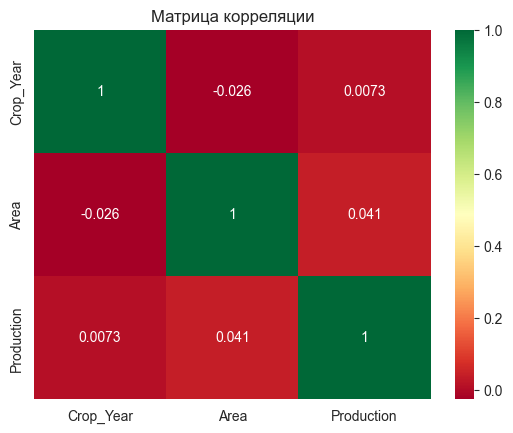

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.title('Матрица корреляции')
plt.show()

Как видим, устойчивой корреляции нет.

### Парный график

Построим парный график. Так как вычислительные мощности ограничены, то построим его на выборке из 500 случайных записей (n=500). Для демонстрации данных этого будет достаточно. Для получения более точного результата необходимы дополнительные вычислительные мощности или выбор другого подхода к анализу.

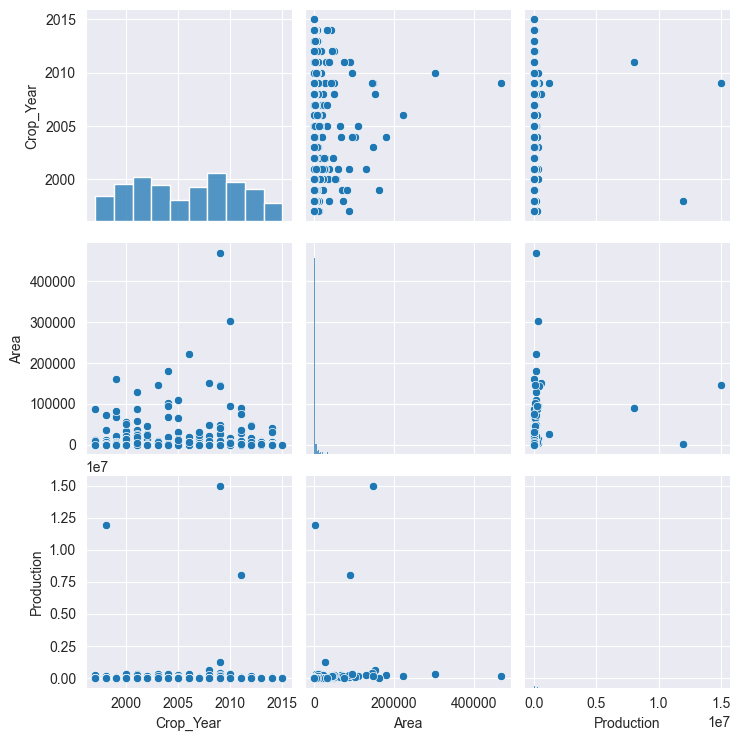

In [13]:
sns.pairplot(df.sample(n=500))

Как видим, какая-либо корреляция между данными отсутствует или она слабо выражена.

## Визуализации динамики изменения показателей

#### Производство сельскохозяйственной продукции по годам

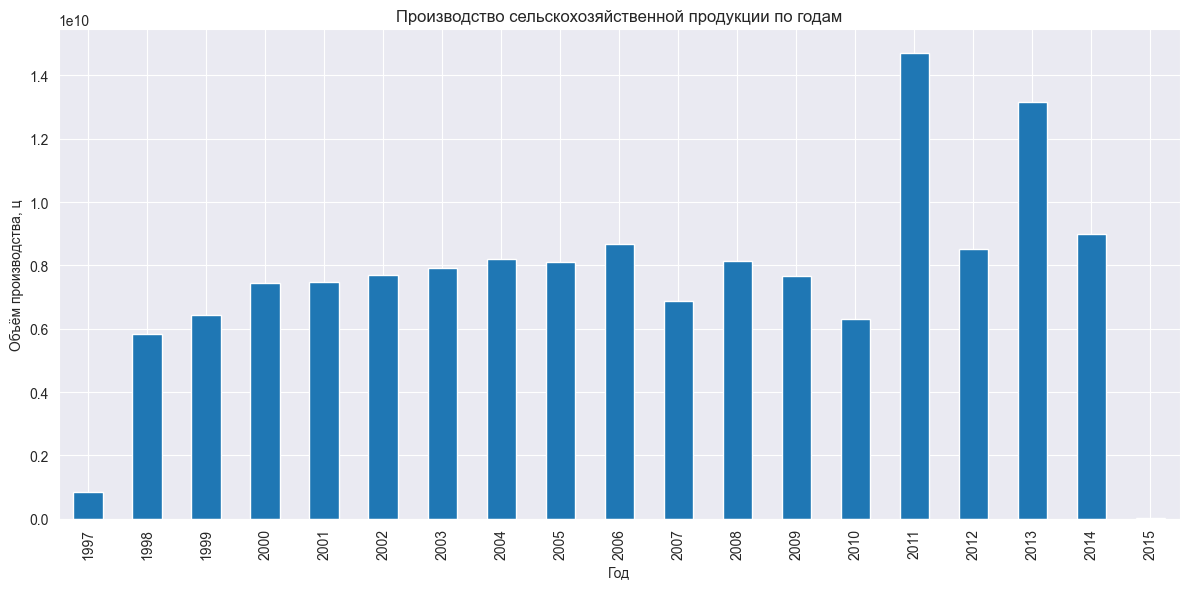

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))  # Создаем фигуру и оси
"""
1) Группирует данные из дата-фрейма по столбцу "Crop_Year" с помощью метода groupby().
2) Для каждой группы (каждого года урожая) вычисляем суммарное значение столбца "Production" с помощью метода agg("sum")
3) Полученные агрегированные данные (суммарная продукция по годам) отображаем в виде вертикальной столбчатой диаграммы (plot.bar()).
4) Аргумент color задает цвета для столбцов диаграммы (5 цветов, которые потом изменяются).
"""
df.groupby("Crop_Year")["Production"].agg("sum").plot.bar(
#    color=['red', 'green', 'blue', 'orange', 'purple']  # Задание цвета столбцов
) 

plt.xlabel('Год')  # Подпись для оси х
plt.ylabel('Объём производства, ц')  # Подпись для оси y
plt.title('Производство сельскохозяйственной продукции по годам')  # Название графика
#plt.annotate('Пик\n2011', xy=(14, 15_000_000_000), xycoords='data', xytext=(12, 14_000_000_000), textcoords='data', arrowprops=dict(facecolor='g'))  # Аннотация стрелкой
#plt.annotate('Мин\n2015', xy=(18, 0), xycoords='data', xytext=(18, 2_000_000_000), textcoords='data', arrowprops=dict(facecolor='r'))  # Аннотация стрелкой
plt.xticks(rotation=90)  # Поворачиваем метки на оси X для лучшей читаемости

# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.show()  # Отображаем диаграмму

Максимум выпуска сельскохозяйственной продукции наблюдался в 2011, 2013 и 2014 годах. Самое низкое производство продукции наблюдалось в 2015 г. и 1997 г.

#### Посевные площади

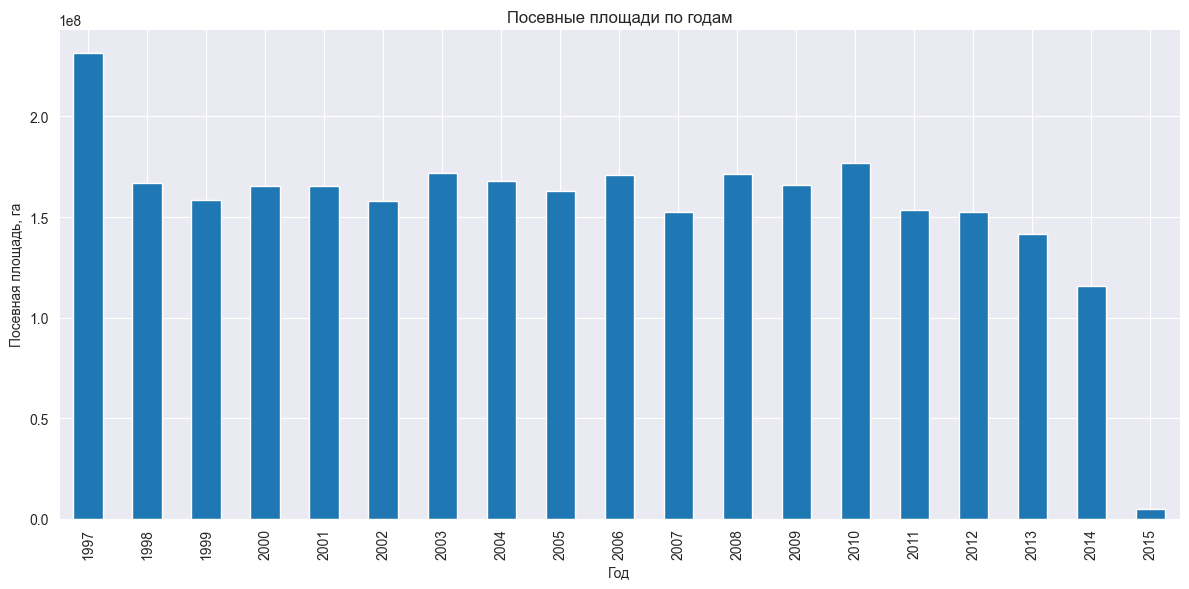

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))  # Создаем фигуру и оси
"""
1) Группирует данные из дата-фрейма по столбцу "Crop_Year" с помощью метода groupby().
2) Для каждой группы (каждого года урожая) вычисляем суммарное значение столбца "Area" с помощью метода agg("sum")
3) Полученные агрегированные данные (суммарная посевная площадь по годам) отображаем в виде вертикальной столбчатой диаграммы (plot.bar()).
4) Аргумент color задает цвета для столбцов диаграммы (5 цветов, которые потом изменяются).
"""
df.groupby("Crop_Year")["Area"].agg("sum").plot.bar(
#    color=['red', 'green', 'blue', 'orange', 'purple']  # Задание цвета столбцов
) 

plt.xlabel('Год')  # Подпись для оси х
plt.ylabel('Посевная площадь, га')  # Подпись для оси y
plt.title('Посевные площади по годам')  # Название графика
plt.xticks(rotation=90)  # Поворачиваем метки на оси X для лучшей читаемости

# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.show()  # Отображаем диаграмму

Из графика видно, что несмотря на различную посевную площадь по годам, ее площадь от года к году находится в определенном диапазоне. В 2014 г. наблюдается снижение посевных площадей. Этот случай требует дополнительного исследования.

## Визуализация и проверка основных гипотез

#### Производство сельскохозяйственной продукции по видам культур (ТОП-10 культур по производству)

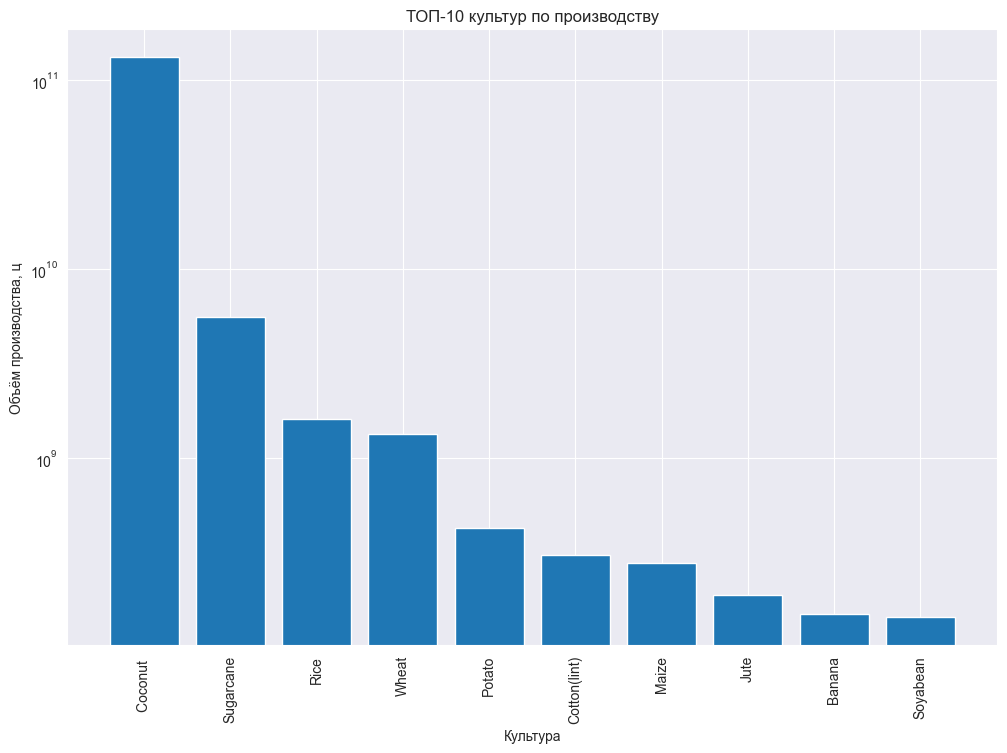

In [24]:
# Группируем данные по культурам и суммируем производство
top_crops = df.groupby('Crop')['Production'].sum().reset_index().sort_values('Production', ascending=False).head(10)

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(12, 8))

# Строим вертикальную столбчатую диаграмму
ax.bar(top_crops['Crop'], top_crops['Production'],
#       color=['red', 'green', 'blue']  # Цвета столбцов
       )

# Настраиваем оси и заголовок
ax.set_xlabel('Культура')
ax.set_ylabel('Объём производства, ц')
ax.set_title('ТОП-10 культур по производству')

# Поворачиваем надписи на оси X
plt.xticks(rotation=90)

# Логарифмируем, т.к. данные выбиваются
plt.yscale('log')

# Отображаем график
plt.show()

Основными сельскохозяйственными культурами Индии являются: __кокосовый орех__ (coconut), __сахарный тростник__ (sugarcane) и __рис__ (rise).

#### Производство сельскохозяйственных культур по временам года

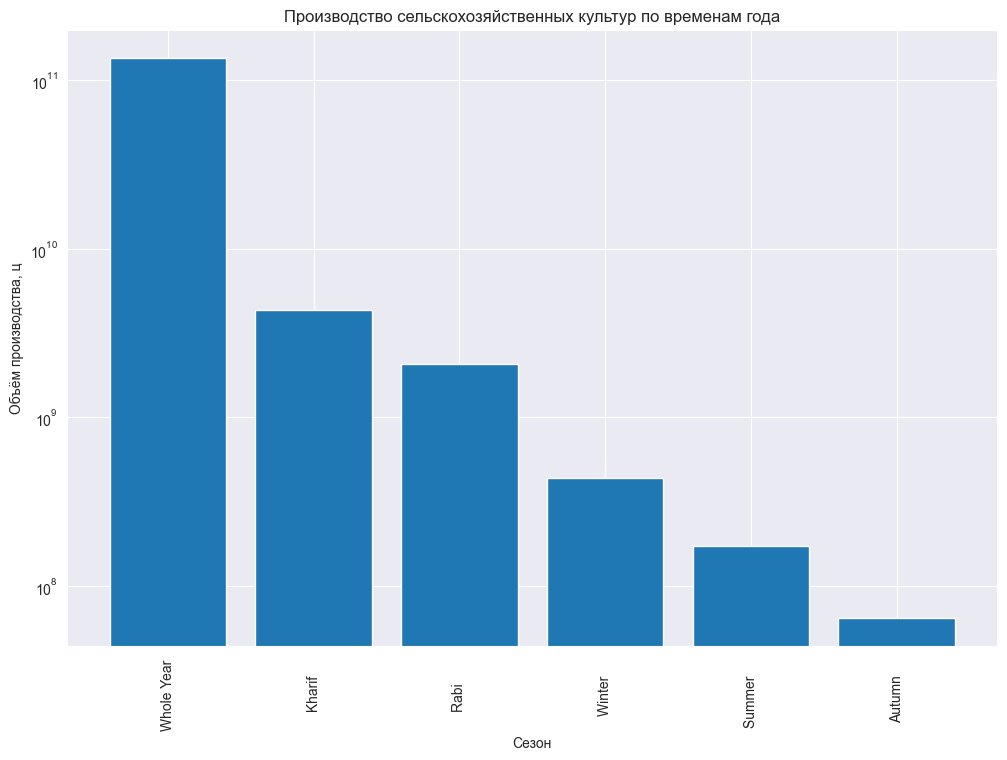

In [25]:
# Группируем данные по культурам и суммируем производство
seasons = df.groupby('Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(12, 8))

# Строим вертикальную столбчатую диаграмму
ax.bar(seasons['Season'], seasons['Production'],
#       color=['red', 'green', 'blue']  # Цвета столбцов
       )

# Настраиваем оси и заголовок
ax.set_xlabel('Сезон')
ax.set_ylabel('Объём производства, ц')
ax.set_title('Производство сельскохозяйственных культур по временам года')

# Поворачиваем надписи на оси X
plt.xticks(rotation=90)

# Логарифмируем, т.к. данные выбиваются
plt.yscale('log')

# Отображаем график
plt.show()

Из графика видно, что больше всего развито круглогодичное производство сельскохозяйственной продукции, а также в периоды сбора урожая Хариф и Раби.

#### Структура сельскохозяйственного производства по штатам Индии

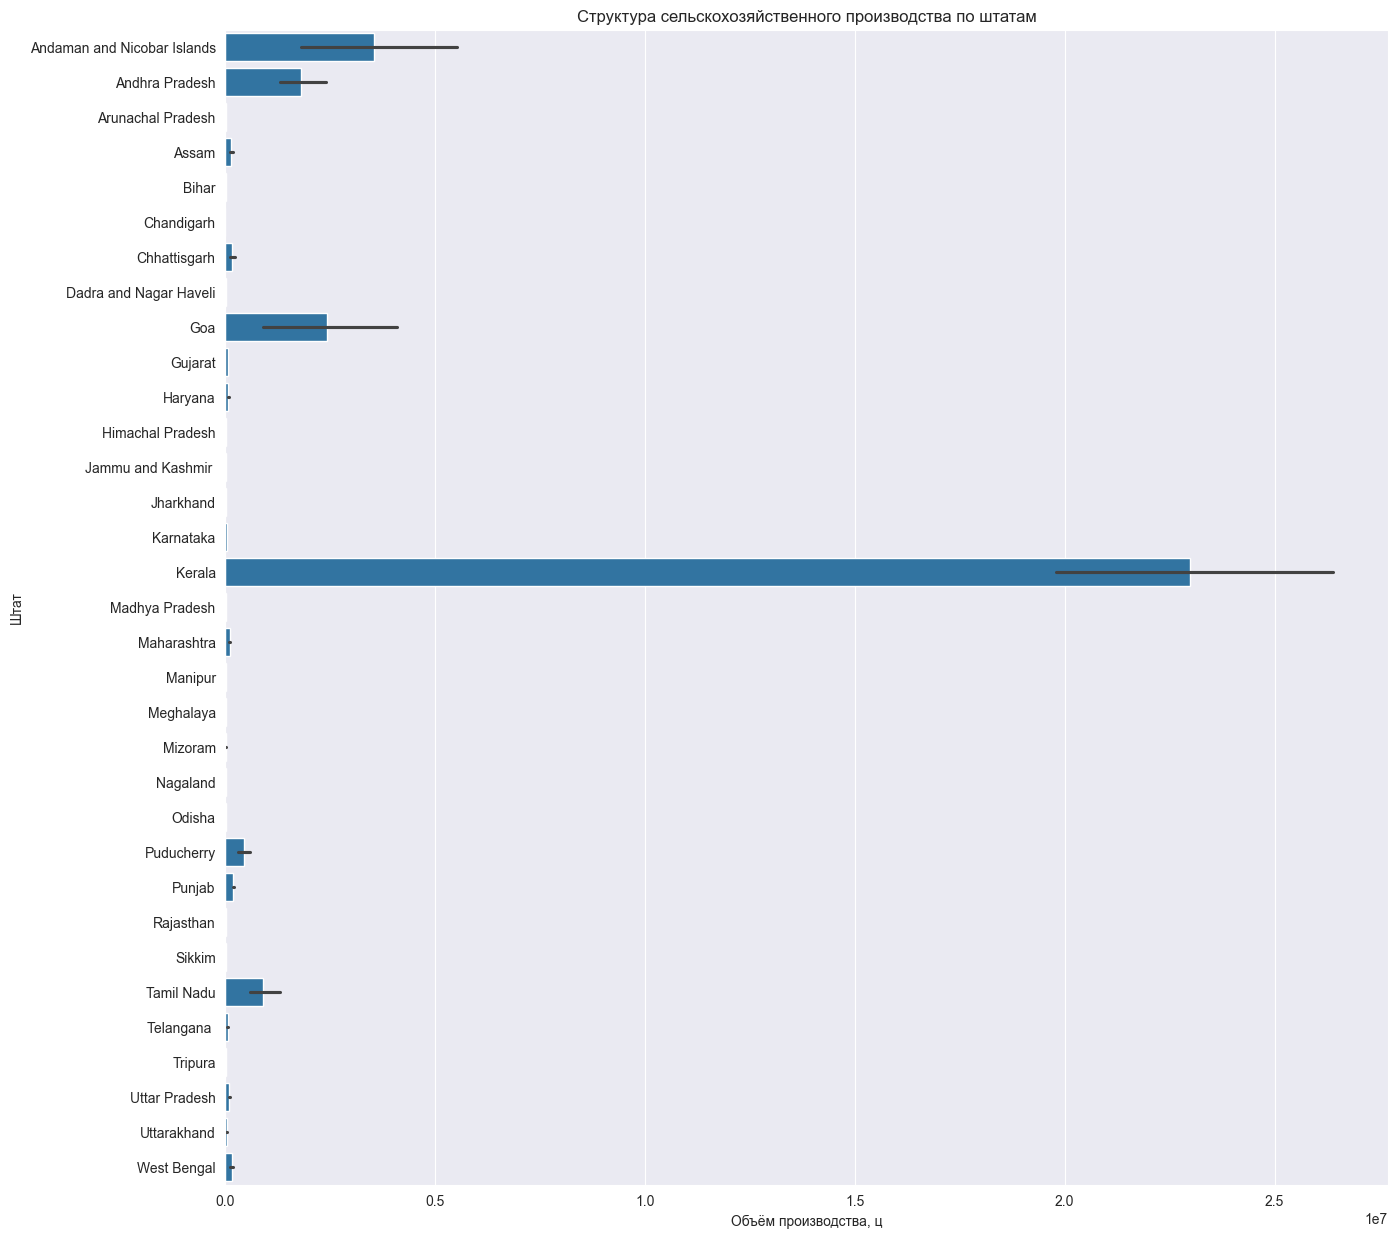

In [37]:
plt.figure(figsize= (15,15))
sns.barplot(x=df['Production'],y=df["State_Name"], orient='h')
plt.xlabel('Объём производства, ц')  # Подпись для оси х
plt.ylabel('Штат')  # Подпись для оси y
plt.title('Структура сельскохозяйственного производства по штатам')  # Название графика

# Отображаем график
plt.show()

Среди штатов Индии лидерами по сельхозпроизводству растениеводческой продукции являютсятся штаты: Andamar and Nicobar Islands, Andhra Pradesh, Goa, Kerala, Tamil Nadu. По объему производства первое место со значительным отрывом занимает штат Kerala.

#### Доля штатов в общем производстве сельскохозяйственной продукции

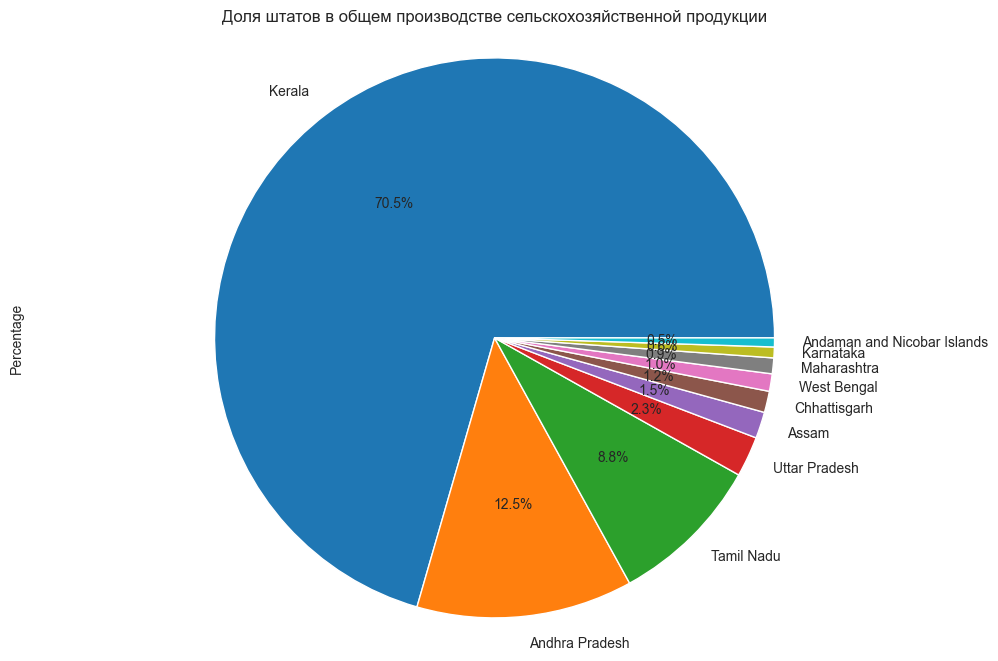

In [46]:
# Группируем данные по штатам и суммируем их производство
state_totals = df.groupby("State_Name")["Production"].sum().reset_index()

# Сортируем данные по убыванию производства
state_totals = state_totals.sort_values("Production", ascending=False)

# Вычисляем общее производство
total_production = state_totals["Production"].sum()

# Вычисляем долю каждого штата в общем производстве
state_totals["Percentage"] = (state_totals["Production"] / total_production) * 100

# Строим круговую диаграмму
plt.figure(figsize=(12, 8))
state_totals["Percentage"].head(10).plot(kind="pie", autopct="%1.1f%%", labels=state_totals["State_Name"])
plt.title("Доля штатов в общем производстве сельскохозяйственной продукции")
plt.axis("equal")
plt.show()


На долю штатов Kerala и Andra Pradesh приходится более 80% всей выпускаемой сельскохозяйственной продукции в Индии.

#### Какие штаты выращивают ТОП-10 культур по сезонам

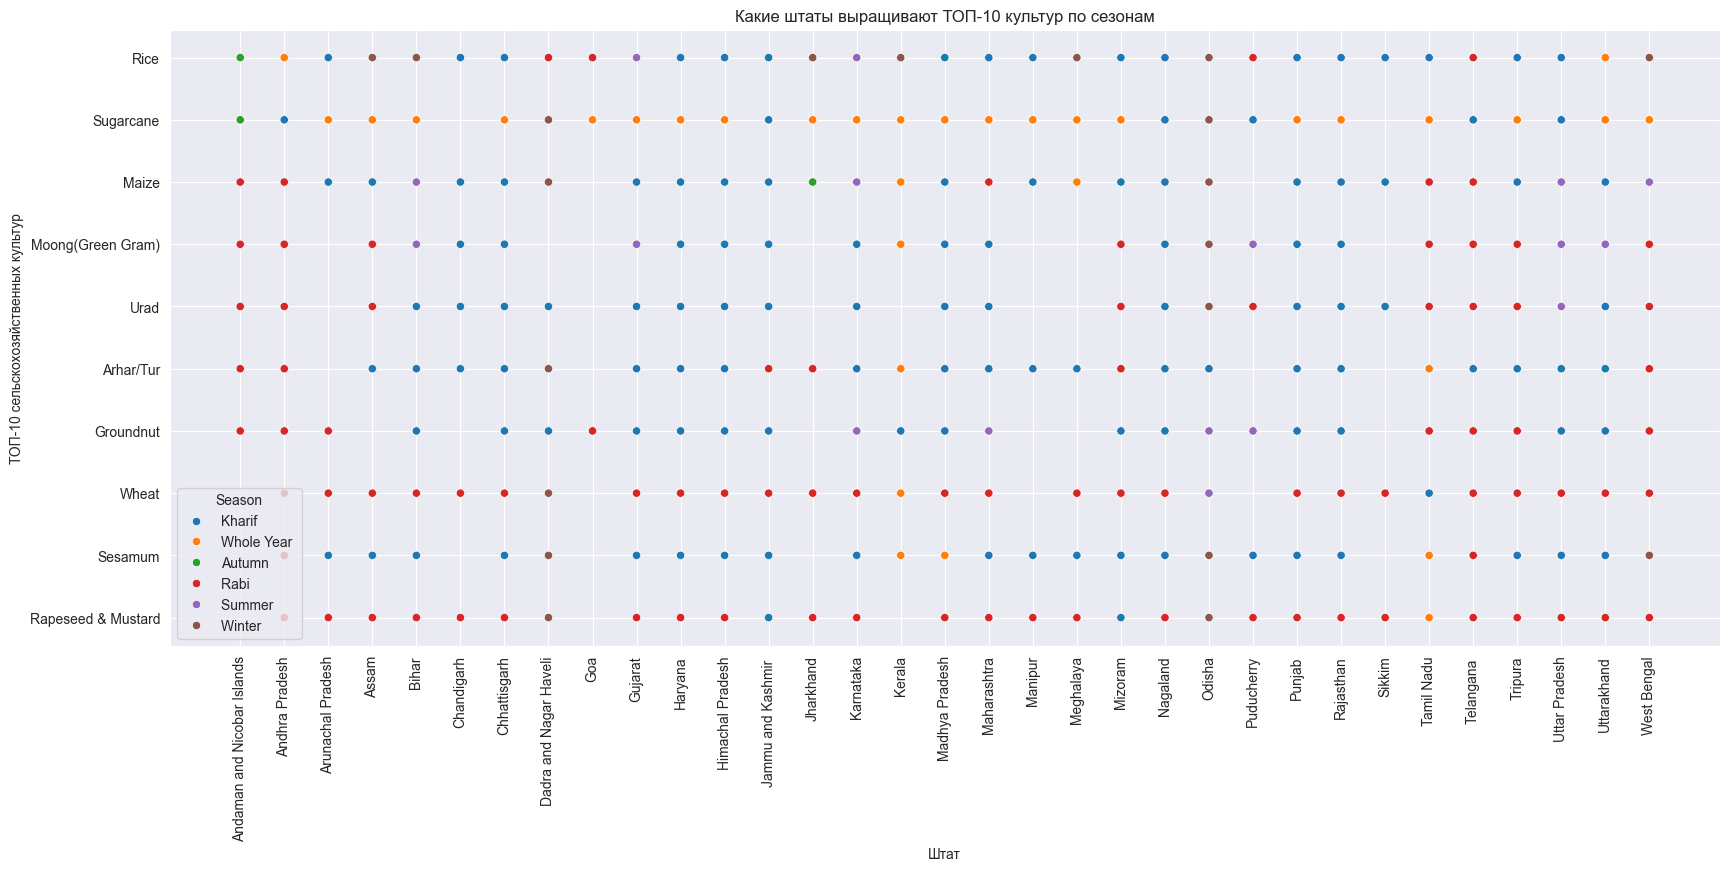

In [41]:
# Определяем топ-10 культур
top_crops = df['Crop'].value_counts().head(10).index

# Фильтруем данные, оставляя только топ-10 культур
filtered_df = df[df['Crop'].isin(top_crops)]

# Строим график
plt.figure(figsize=(20,8))
sns.scatterplot(data=filtered_df, x="State_Name", y="Crop", hue="Season")
plt.xticks(rotation=90)
plt.xlabel('Штат')  # Подпись для оси х
plt.ylabel('ТОП-10 сельскохозяйственных культур')  # Подпись для оси y
plt.title('Какие штаты выращивают ТОП-10 культур по сезонам')  # Название графика

plt.show()

Рис выращивают во всех штатах. Его сбор в большистве штатов приходится на сезон Хариф. Кроме того, почти во всех штатах выращивают рапс и горчицу (Rapeseed & Mustard) со сборов в сезоне Раби. Среди культур, которые выращивают все штаты круглогодично можно отметить сахарный тростник (Sugarcane). Есть штаты (Goa и другие), которые не выращивают ТОП-10 культур, а отличаются другими культурами.

## Выводы

- Максимум выпуска сельскохозяйственной продукции наблюдался в 2011, 2013 и 2014 годах. Самое низкое производство продукции наблюдалось в 2015 г. и 1997 г.
- Посевная площадь от года к году находится в определенном диапазоне. В 2014 г. наблюдается снижение посевных площадей. Этот случай требует дополнительного исследования.
- Больше всего развито круглогодичное производство сельскохозяйственной продукции, а также в периоды сбора урожая Хариф и Раби.
- Среди штатов Индии лидерами по сельхозпроизводству растениеводческой продукции являютсятся штаты: Andamar and Nicobar Islands, Andhra Pradesh, Goa, Kerala, Tamil Nadu. По объему производства первое место со значительным отрывом занимает штат Kerala.
- На долю штатов Kerala и Andra Pradesh приходится более 80% всей выпускаемой сельскохозяйственной продукции в Индии.
- Основными сельскохозяйственными культурами Индии являются: кокосовый орех, сахарный тростник и рис.
- Рис выращивают во всех штатах. Его сбор в большистве штатов приходится на сезон Хариф. Кроме того, почти во всех штатах выращивают рапс и горчицу (Rapeseed & Mustard) со сборов в сезоне Раби. Среди культур, которые выращивают все штаты круглогодично можно отметить сахарный тростник (Sugarcane). Есть штаты (Goa и другие), которые не выращивают ТОП-10 культур, а отличаются другими культурами.

### Продолжение исследований

Исследование данной темы можно продолжить в следующих направлениях:

- объединить все сельскохозяйственные культуры по категориям и произвести анализ по этим категориям
- объединить штаты и округа в географические районы и определить районы с наиболее благоприятным климатом для выращивания продукции